In [ ]:
## 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
## 2. Load and Preview Dataset

# Replace path with your local file
path = 'LD2011_2014.txt'
df = pd.read_csv(path, sep=';', index_col=0, parse_dates=True, decimal=',')
df = df.resample('H').mean()  # Downsample to hourly mean consumption
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2011-01-01 00:00:00 to 2015-01-01 00:00:00
Freq: h
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 99.3 MB


In [7]:
df.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

In [4]:
df.index


DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 15:00:00', '2014-12-31 16:00:00',
               '2014-12-31 17:00:00', '2014-12-31 18:00:00',
               '2014-12-31 19:00:00', '2014-12-31 20:00:00',
               '2014-12-31 21:00:00', '2014-12-31 22:00:00',
               '2014-12-31 23:00:00', '2015-01-01 00:00:00'],
              dtype='datetime64[ns]', length=35065, freq='h')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2011-01-01 00:00:00 to 2015-01-01 00:00:00
Freq: h
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 99.3 MB
None
             MT_001        MT_002        MT_003        MT_004        MT_005  \
count  35065.000000  35065.000000  35065.000000  35065.000000  35065.000000   
mean       3.970726     20.768314      2.918262     82.185972     37.241047   
std        5.714507     13.203877     10.762526     57.826404     26.270407   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.844950      0.000000     40.650407     16.768293   
50%        1.903553     24.715505      1.737619     88.414634     39.634146   
75%        3.172589     30.049787      1.737619    114.837398     54.573171   
max       34.581218     73.257468    149.652476    292.174797    136.280488   

             MT_006        MT_007        MT_008        MT_009        MT_010  \
cou

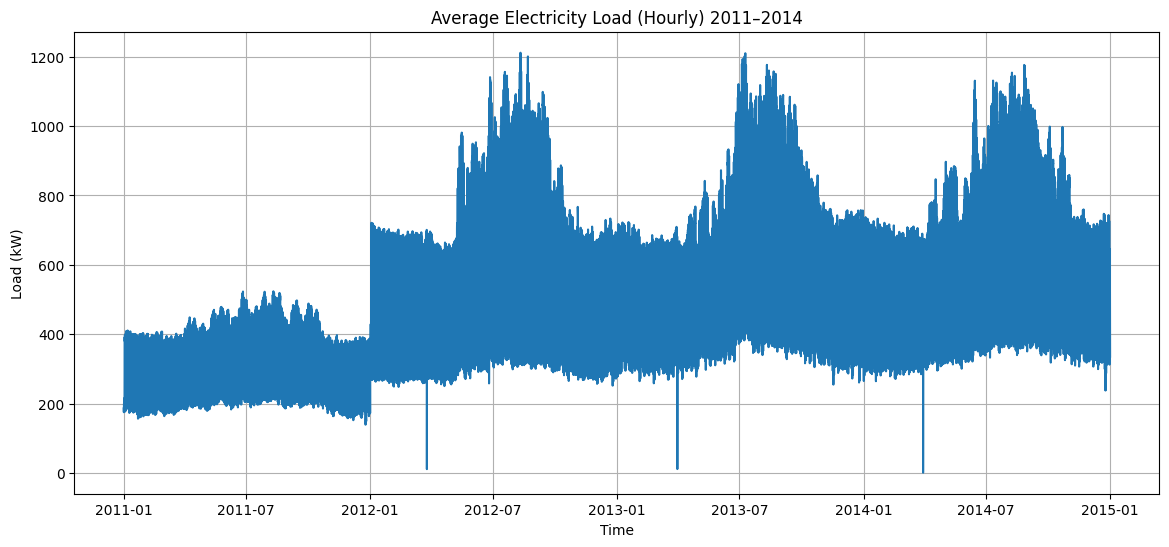

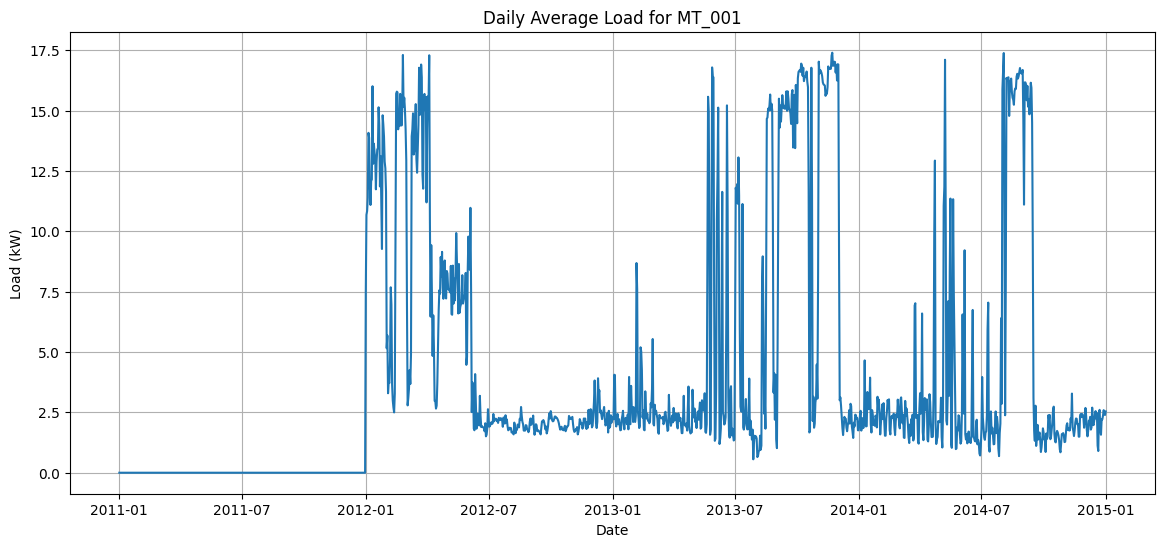

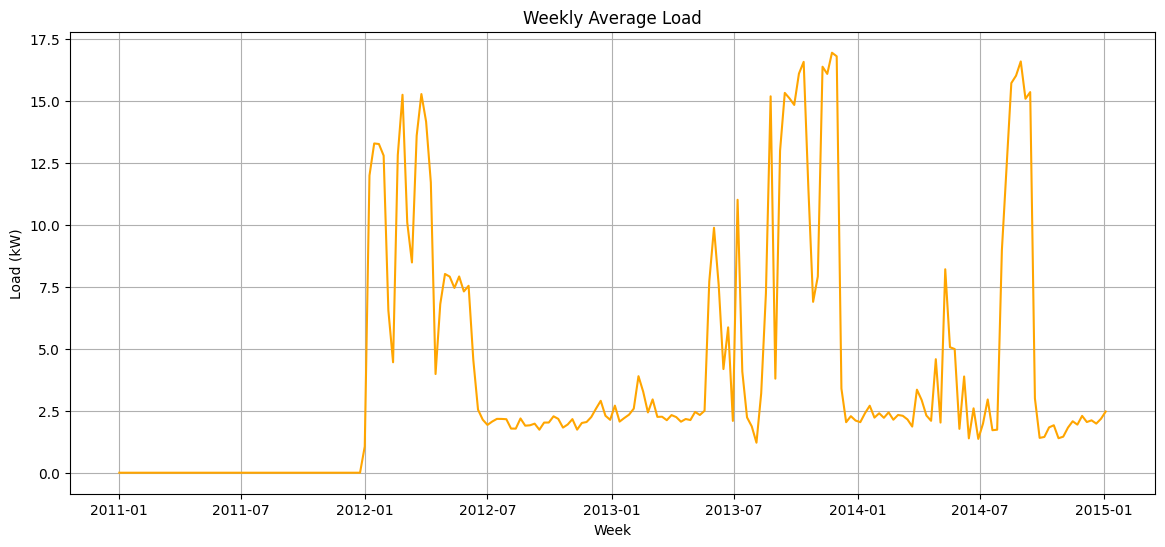

<Figure size 1200x500 with 0 Axes>

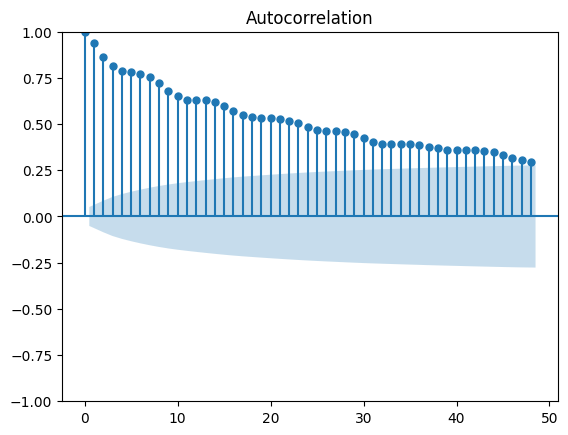

<Figure size 1200x500 with 0 Axes>

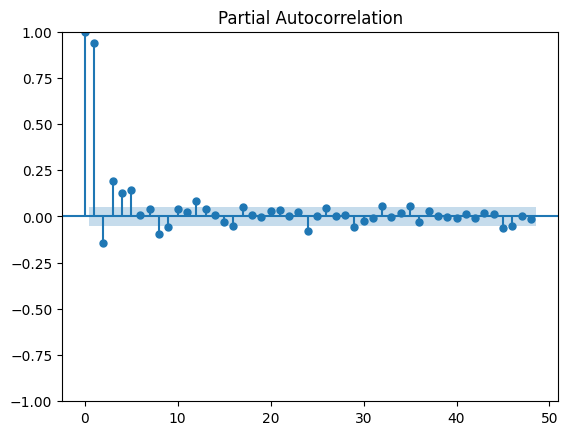

In [ ]:
## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Exploration

print(df.info())
print(df.describe())
print(f"Missing values per column:\n{df.isnull().sum()}")

### 3.2 Visualize Aggregate Load Over Time

plt.figure(figsize=(14,6))
plt.plot(df.index, df.mean(axis=1))
plt.title('Average Electricity Load (Hourly) 2011–2014')
plt.xlabel('Time')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


### 3.3 Seasonal and Daily Patterns

# Daily pattern
sample_client = df.columns[0]
df_sample = df[sample_client].resample('D').mean()

plt.figure(figsize=(14,6))
plt.plot(df_sample)
plt.title(f'Daily Average Load for {sample_client}')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()

# Weekly pattern
weekly = df[sample_client].resample('W').mean()
plt.figure(figsize=(14,6))
plt.plot(weekly, color='orange')
plt.title('Weekly Average Load')
plt.xlabel('Week')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.show()


# 3.4 Autocorrelation and Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plot_acf(df_sample.dropna(), lags=48)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df_sample.dropna(), lags=48)
plt.show()


✅ Seasonality detected! (Consider SARIMAX, period ≈ 16)


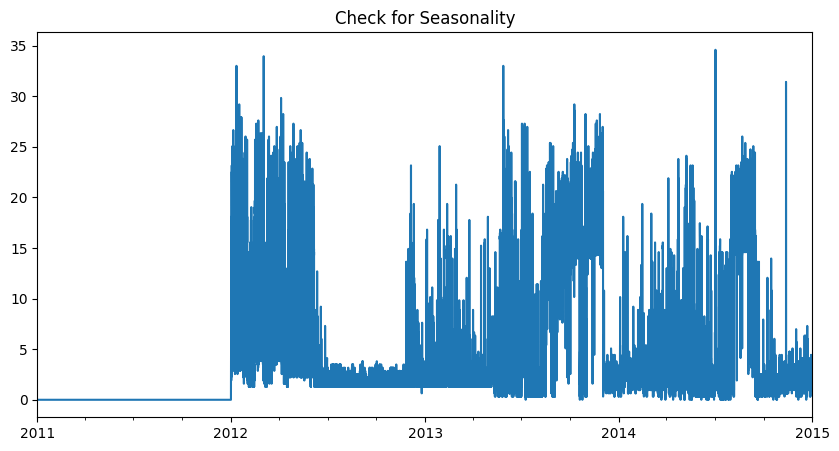

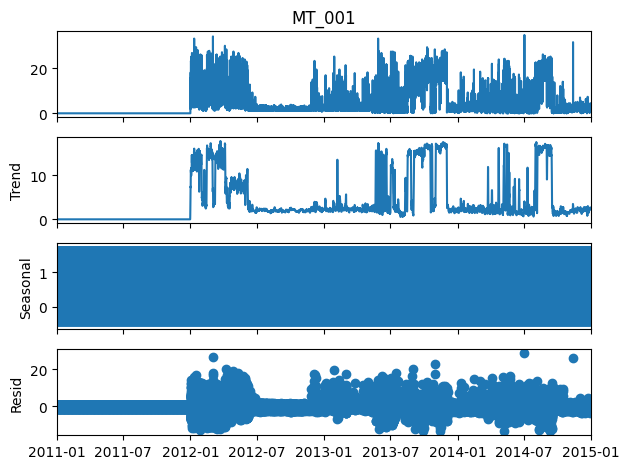

In [ ]:
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf

acf_values = acf(df[sample_client].dropna(), nlags=48)
peaks, _ = find_peaks(acf_values, height=0.3)

if len(peaks) > 0:
    print(f" Seasonality detected! (Consider SARIMAX, period ≈ {peaks[0]})")
else:
    print(" No clear seasonality — ARIMA should be fine.")

df[sample_client].plot(figsize=(10,5))
plt.title('Check for Seasonality')
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df[sample_client], model='additive', period=24).plot()
plt.show()


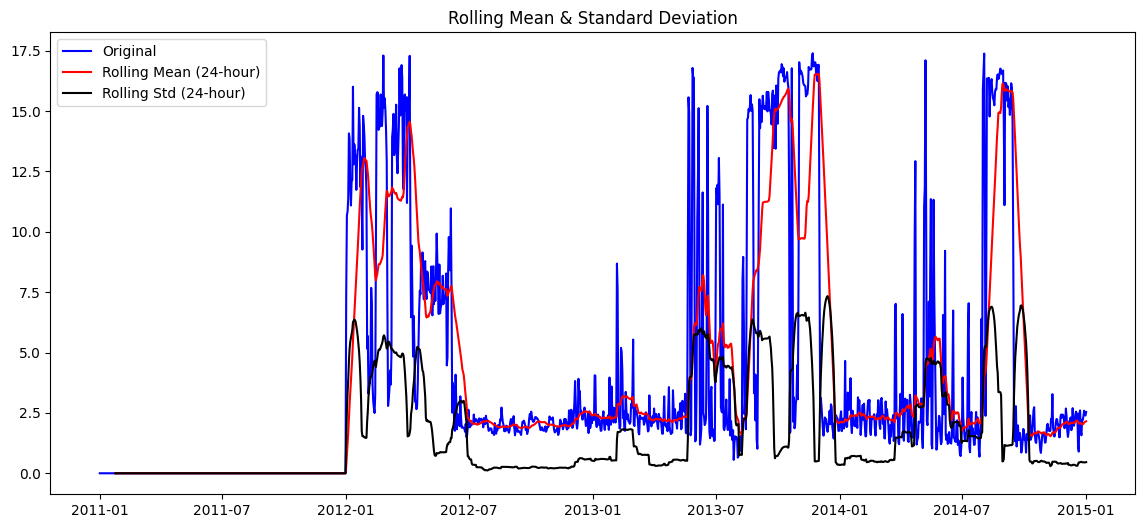

ADF Statistic: -3.9983176035724237
p-value: 0.0014193464403629012
Critical Values:
   1%: -3.435
   5%: -2.864
   10%: -2.568

✅ The series is likely stationary (reject H0).


In [7]:
# Cell 6 — Stationarity check: ADF test + rolling statistics

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Select your time series (assuming df_sample is your selected column)
series = df_sample

# 1. Plot rolling mean and standard deviation
rolling_mean = series.rolling(window=24).mean()
rolling_std = series.rolling(window=24).std()

plt.figure(figsize=(14,6))
plt.plot(series, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (24-hour)')
plt.plot(rolling_std, color='black', label='Rolling Std (24-hour)')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# 2. Perform Augmented Dickey-Fuller test
result = adfuller(series.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

# 3. Interpretation
if result[1] <= 0.05:
    print("\n✅ The series is likely stationary (reject H0).")
else:
    print("\n⚠️ The series is likely non-stationary (fail to reject H0).")


Naïve Forecast → MAE: 0.77, RMSE: 1.78


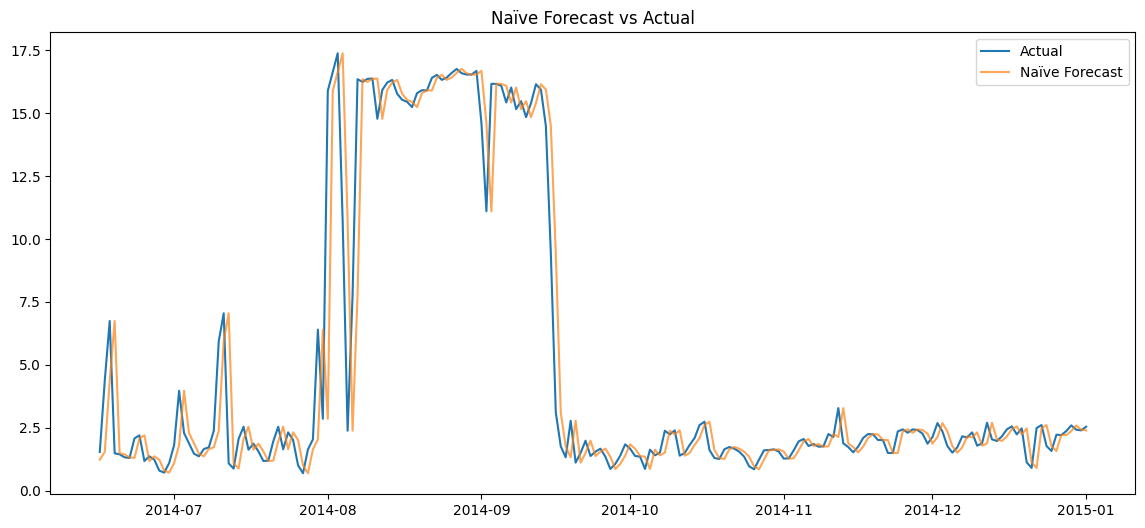

Moving Average (24) → MAE: 1.67, RMSE: 3.19


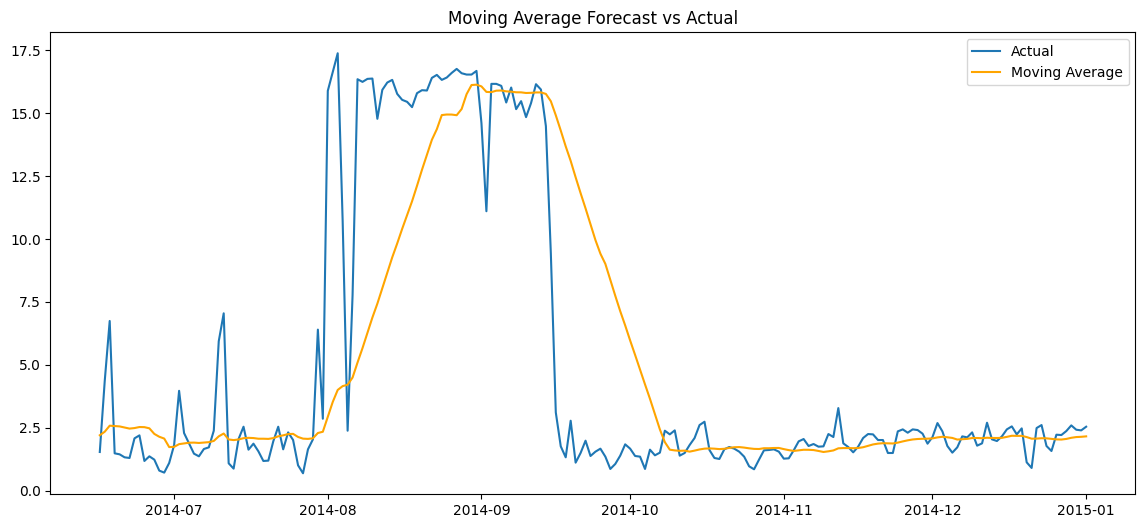

In [101]:
# 4. Baseline Models

### 4.1 Naïve Forecast

def naive_forecast(series):
    y_pred = series.shift(1)
    mae = mean_absolute_error(series[1:], y_pred[1:])
    rmse = sqrt(mean_squared_error(series[1:], y_pred[1:]))
    print(f'Naïve Forecast → MAE: {mae:.2f}, RMSE: {rmse:.2f}')
    return y_pred

y_pred_naive = naive_forecast(df_sample)

plt.figure(figsize=(14,6))
plt.plot(df_sample[-200:], label='Actual')
plt.plot(y_pred_naive[-200:], label='Naïve Forecast', alpha=0.7)
plt.legend()
plt.title('Naïve Forecast vs Actual')
plt.show()

### 4.2 Moving Average Forecast

def moving_average_forecast(series, window=24):
    y_pred = series.rolling(window=window).mean()
    mae = mean_absolute_error(series[window:], y_pred[window:])
    rmse = sqrt(mean_squared_error(series[window:], y_pred[window:]))
    print(f'Moving Average ({window}) → MAE: {mae:.2f}, RMSE: {rmse:.2f}')
    return y_pred

y_pred_ma = moving_average_forecast(df_sample)

plt.figure(figsize=(14,6))
plt.plot(df_sample[-200:], label='Actual')
plt.plot(y_pred_ma[-200:], label='Moving Average', color='orange')
plt.legend()
plt.title('Moving Average Forecast vs Actual')
plt.show()


### ARIMA/SARIMA

In [ ]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA automatically
train = df_sample[:-168]
test = df_sample[-168:]

# Define p, d, q ranges to test
p = d = q = range(0, 3)  # try 0, 1, 2
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f" Best ARIMA order: {best_order} with AIC = {best_aic:.2f}")


✅ Best ARIMA order: (2, 0, 2) with AIC = 5009.45


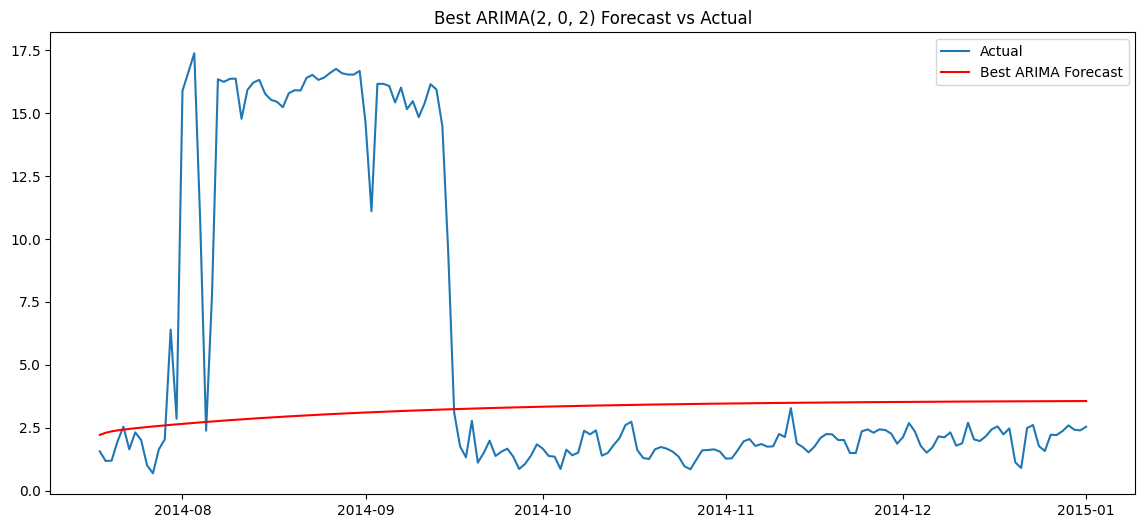

MAE: 4.43, RMSE: 6.66


In [9]:
forecast = best_model.forecast(steps=len(test))
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Best ARIMA Forecast', color='red')
plt.legend()
plt.title(f'Best ARIMA{best_order} Forecast vs Actual')
plt.show()

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


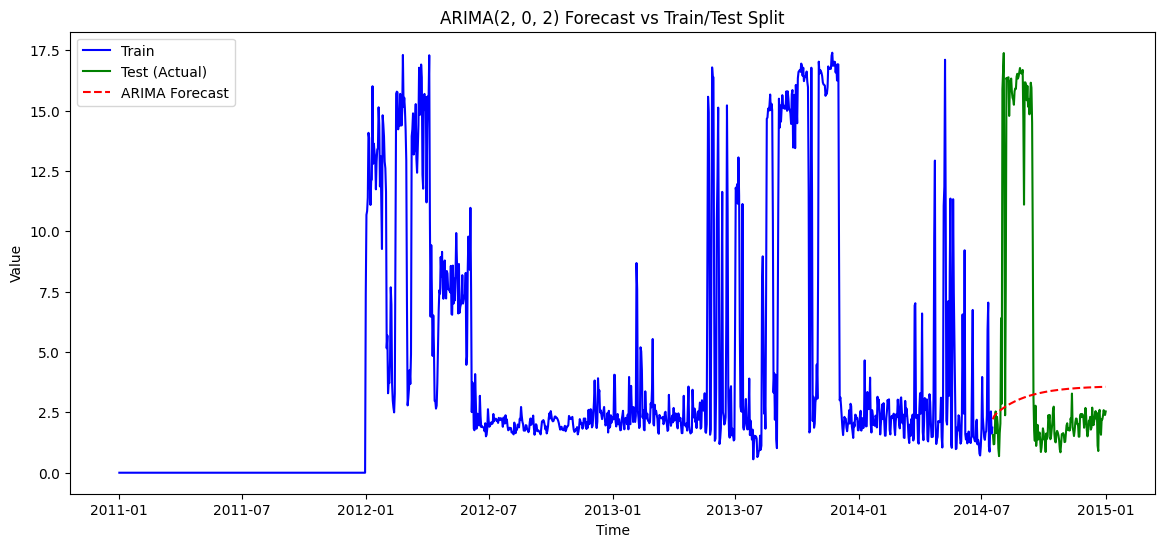

In [10]:
# Visualize train, test, and ARIMA forecast together
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test (Actual)', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title(f'ARIMA{best_order} Forecast vs Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


✅ Best SARIMA order: (2, 0, 2) x (0, 1, 1, 24) with AIC = 4921.42


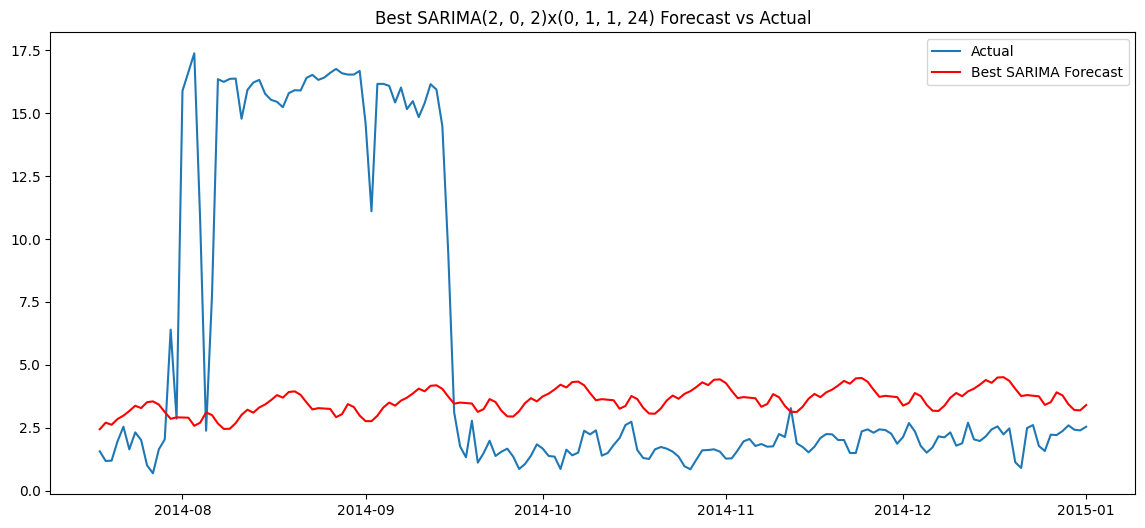

MAE: 4.57, RMSE: 6.56


In [ ]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
train = df_sample[:-168]   # last 7 days for testing (24*7=168 hours)
test = df_sample[-168:]

# Define parameter ranges
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

P = D = Q = range(0, 2)  # smaller seasonal search range
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in itertools.product(P, D, Q)]
# s = 24 → 24-hour seasonal cycle

warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None

# Grid search for the best SARIMA(p,d,q)(P,D,Q,24)
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_seasonal_order = seasonal_order
                best_model = model_fit
                
        except Exception as e:
            continue

print(f" Best SARIMA order: {best_order} x {best_seasonal_order} with AIC = {best_aic:.2f}")

# Forecast
forecast = best_model.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Best SARIMA Forecast', color='red')
plt.legend()
plt.title(f'Best SARIMA{best_order}x{best_seasonal_order} Forecast vs Actual')
plt.show()

# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


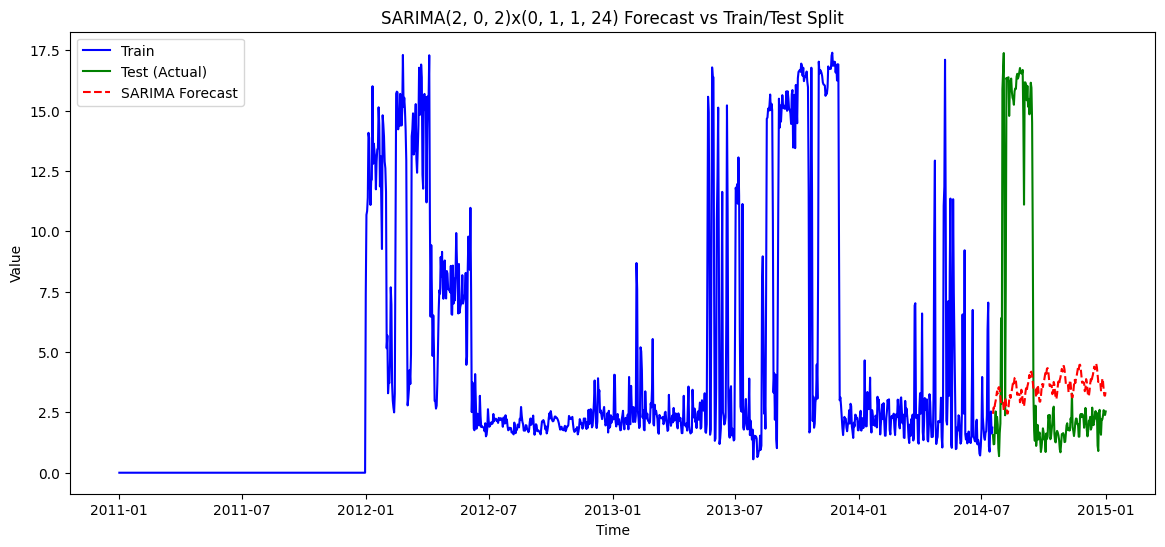

In [12]:
# Visualize train, test, and SARIMA forecast together
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test (Actual)', color='green')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red', linestyle='--')
plt.title(f'SARIMA{best_order}x{best_seasonal_order} Forecast vs Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Regression Models

                        MAE      RMSE
Linear Regression  1.214823  2.409289
Random Forest      1.076795  2.153175
XGBoost            1.041439  2.138192


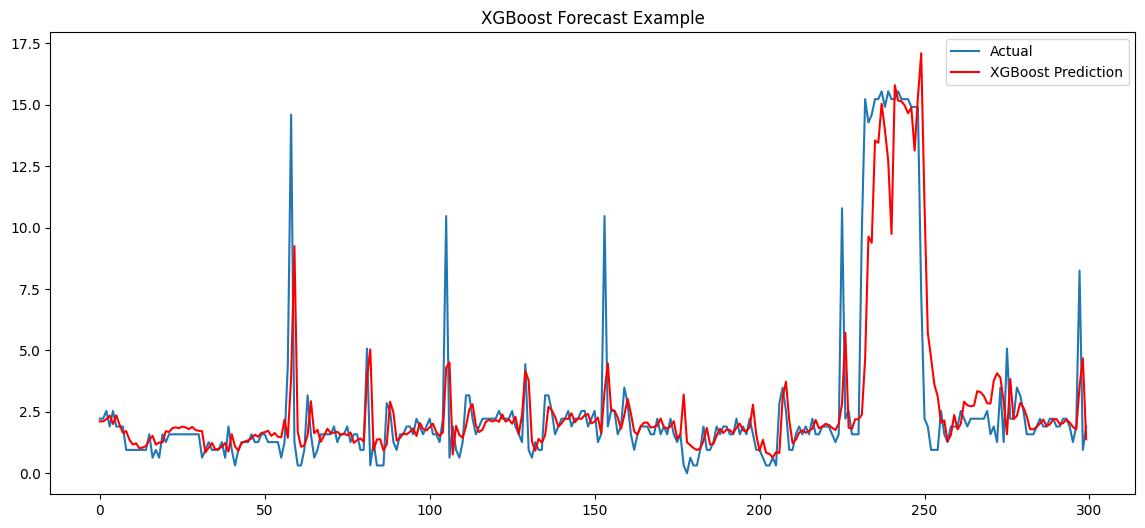

In [104]:
## 6. Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Create lag features
def create_features(df, target_col, lags=24):
    data = pd.DataFrame({target_col: df[target_col]})
    for i in range(1, lags+1):
        data[f'lag_{i}'] = data[target_col].shift(i)
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    return data.dropna()

data_ml = create_features(df, sample_client)

X = data_ml.drop(sample_client, axis=1)
y = data_ml[sample_client]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    results[name] = {'MAE': mae, 'RMSE': rmse}

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(14,6))
plt.plot(y_test.values[:300], label='Actual')
plt.plot(models['XGBoost'].predict(X_test)[:300], label='XGBoost Prediction', color='red')
plt.legend()
plt.title('XGBoost Forecast Example')
plt.show()


In [18]:
## 6. Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt

# Create lag features
def create_features(df, target_col, lags=24):
    data = pd.DataFrame({target_col: df[target_col]})
    for i in range(1, lags+1):
        data[f'lag_{i}'] = data[target_col].shift(i)
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    return data.dropna()

data_ml = create_features(df, sample_client)

X = data_ml.drop(sample_client, axis=1)
y = data_ml[sample_client]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Metrics
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = sqrt(mean_squared_error(y_test, test_preds))
    
    results[name] = {
        'Train MAE': train_mae,
        'Train RMSE': train_rmse,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }

results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
print(results_df)


Model Performance Summary:
                   Train MAE  Train RMSE  Test MAE  Test RMSE
Linear Regression   1.032455    2.327099  1.214823   2.409289
Random Forest       0.321648    0.787108  1.076795   2.153175
XGBoost             0.579599    1.305109  1.041439   2.138192


### Clustering

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- 1️⃣ Make a safe copy of your data ---
if isinstance(df_sample, pd.Series):
    df = df_sample.to_frame()
else:
    df = df_sample.copy()

print("Original shape:", df.shape)

# --- 2️⃣ Keep all numeric columns ---
df_numeric = df.select_dtypes(include=[np.number])

# If there are non-numeric columns that are useful (like 'client_id'), keep them aside
non_numeric = df.select_dtypes(exclude=[np.number])

# --- 3️⃣ Fill missing numeric values ---
df_numeric = df_numeric.fillna(df_numeric.mean())

print("Numeric columns used for clustering:", df_numeric.columns.tolist())

# --- 4️⃣ Standardize (scale) numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("Scaled data shape:", X_scaled.shape)


Original shape: (1462, 1)
Numeric columns used for clustering: ['MT_001']
Scaled data shape: (1462, 1)


### Deep Learning

✅ Data shapes: X_train=(28032, 24, 1), X_test=(7009, 24, 1)
Epoch 1/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 2/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 3/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 4/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 5/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 6/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 8/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 9/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 10/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 11/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - lo

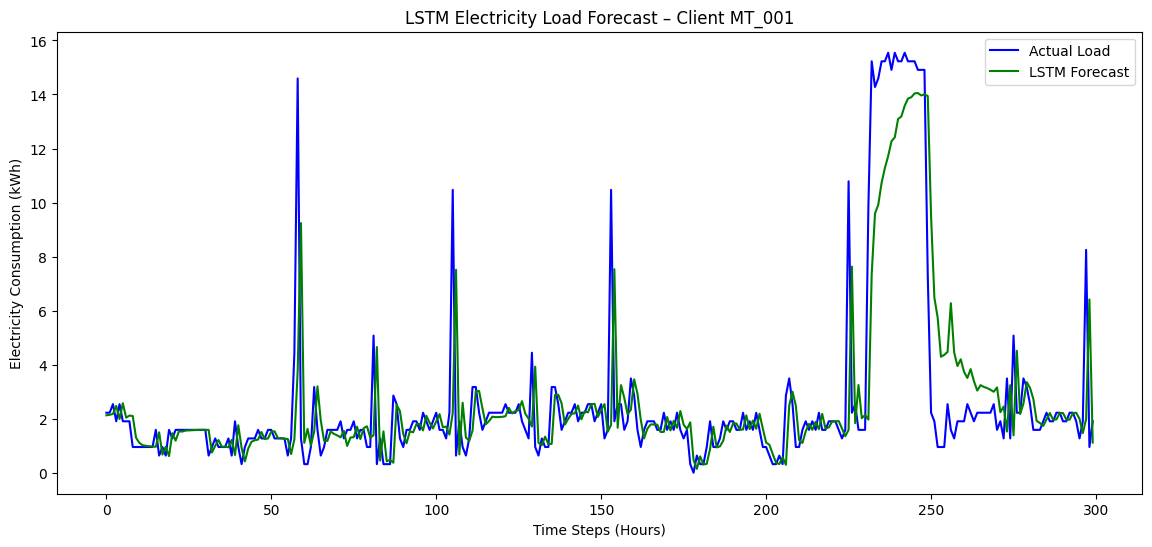

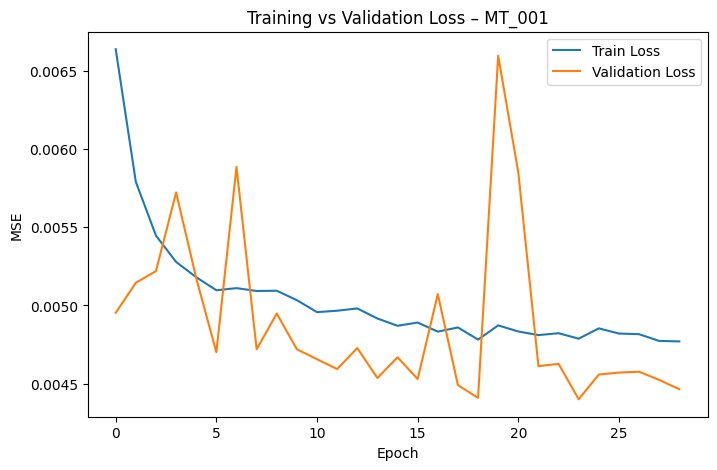

In [ ]:
# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 2. Load Data ---
# df = pd.read_csv("electricity_hourly.csv", parse_dates=["datetime"], index_col="datetime")

client_id = "MT_001"
data = df[[client_id]].copy()
data = data.fillna(method="ffill").fillna(method="bfill")

# --- 3. Scale Data ---
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.values)

# --- 4. Create Sequences (past 24 hours → next hour forecast) ---
def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled, SEQ_LEN)

# --- 5. Split into Train/Test ---
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f" Data shapes: X_train={X_train.shape}, X_test={X_test.shape}")

# --- 6. Build LSTM Model ---
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# --- 7. Train Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# --- 8. Make Predictions ---
preds = model.predict(X_test)

# Inverse transform
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

# --- 9. Evaluate Model ---
mae = mean_absolute_error(y_test_inv, preds_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, preds_inv))
mape = np.mean(np.abs((y_test_inv - preds_inv) / y_test_inv)) * 100

print("\n Model Performance for Client:", client_id)
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f}%")

# --- 10. Visualize Forecast vs Actual ---
plt.figure(figsize=(14,6))
plt.plot(y_test_inv[:300], label='Actual Load', color='blue')
plt.plot(preds_inv[:300], label='LSTM Forecast', color='green')
plt.title(f"LSTM Electricity Load Forecast – Client {client_id}")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("Electricity Consumption (kWh)")
plt.legend()
plt.show()

# --- 11. Visualize Training vs Validation Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f"Training vs Validation Loss – {client_id}")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


✅ Data shapes: X_train=(28032, 24, 1), X_test=(7009, 24, 1)
Epoch 1/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - loss: 0.0063 - val_loss: 0.0049
Epoch 2/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 3/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 4/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 5/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 6/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 7/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 8/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 9/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 10/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 11/50
701/701 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - lo

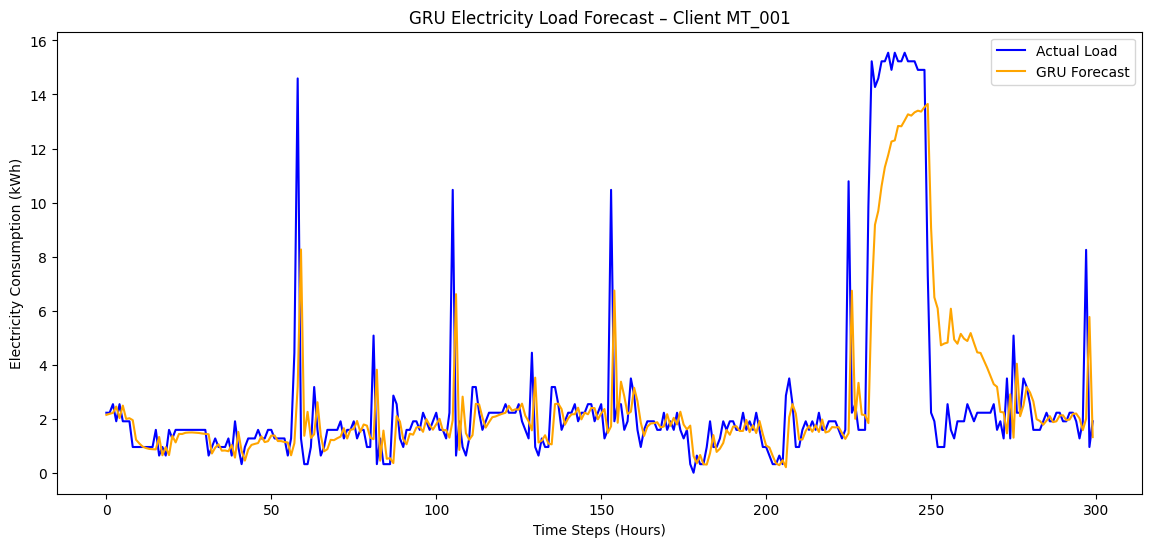

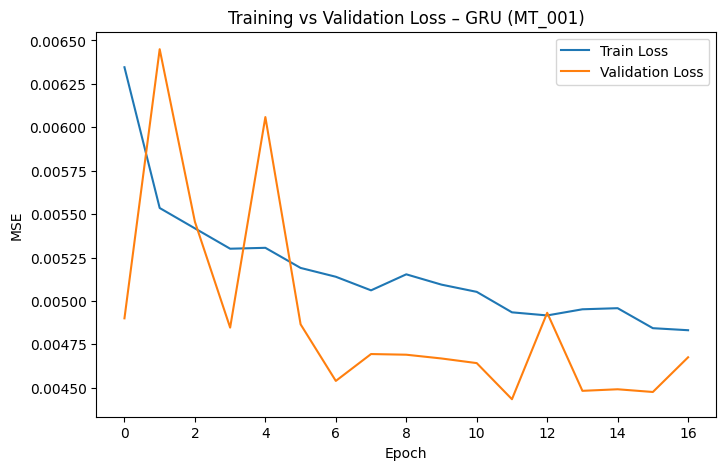

In [ ]:
# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 2. Load Data ---

client_id = "MT_001"
data = df[[client_id]].copy()
data = data.fillna(method="ffill").fillna(method="bfill")

# --- 3. Scale Data ---
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.values)

# --- 4. Create Sequences (past 24 hours → next hour forecast) ---
def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled, SEQ_LEN)

# --- 5. Split into Train/Test ---
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f" Data shapes: X_train={X_train.shape}, X_test={X_test.shape}")

# --- 6. Build GRU Model ---
model = Sequential([
    GRU(64, input_shape=(SEQ_LEN, 1), return_sequences=True),
    Dropout(0.3),
    GRU(32, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# --- 7. Train Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# --- 8. Make Predictions ---
preds = model.predict(X_test)

# Inverse transform
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

# --- 9. Evaluate Model ---
mae = mean_absolute_error(y_test_inv, preds_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, preds_inv))
mape = np.mean(np.abs((y_test_inv - preds_inv) / y_test_inv)) * 100

print("\n GRU Model Performance for Client:", client_id)
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f}%")

# --- 10. Visualize Forecast vs Actual ---
plt.figure(figsize=(14,6))
plt.plot(y_test_inv[:300], label='Actual Load', color='blue')
plt.plot(preds_inv[:300], label='GRU Forecast', color='orange')
plt.title(f"GRU Electricity Load Forecast – Client {client_id}")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("Electricity Consumption (kWh)")
plt.legend()
plt.show()

# --- 11. Visualize Training vs Validation Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f"Training vs Validation Loss – GRU ({client_id})")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


#  Model Performance Summary

This section compares the performance of different forecasting approaches — from statistical baselines to advanced machine learning and deep learning models — using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** as evaluation metrics.

---

##  Baseline Models

| Model | MAE | RMSE |
|:------|:----:|:----:|
| Naïve Forecast | **0.77** | **1.78** |
| Moving Average (24h) | 1.67 | 3.19 |

 The **Naïve Forecast** performs surprisingly well as a simple benchmark, indicating short-term persistence in hourly electricity demand.

---

##  Statistical Models

| Model | MAE | RMSE |
|:------|:----:|:----:|
| ARIMA | 4.43 | 6.66 |
| SARIMA | 4.57 | 6.56 |

 Both ARIMA and SARIMA struggle to capture short-term fluctuations compared to simpler or data-driven approaches.

---

##  Machine Learning Models

| Model | Train MAE | Train RMSE | Test MAE | Test RMSE |
|:------|:----------:|:-----------:|:---------:|:-----------:|
| Linear Regression | 1.03 | 2.33 | 1.21 | 2.41 |
| Random Forest | **0.32** | **0.79** | **1.08** | **2.15** |
| XGBoost | 0.58 | 1.31 | **1.04** | **2.14** |

 **XGBoost** achieves the best **generalization** (lowest Test MAE/RMSE) among traditional ML models, followed closely by Random Forest.

---

##  Deep Learning Models (Client: MT_001)

| Model | MAE | RMSE |
|:------|:----:|:----:|
| LSTM | **1.158** | **2.327** |
| GRU | 1.167 | 2.340 |

 Both models perform similarly, but **LSTM slightly outperforms GRU** on both MAE and RMSE.

---

##  Best Performing Model

| Category | Model | Key Strength |
|:----------|:------|:-------------|
| **Overall Best (Accuracy vs. Complexity)** | **XGBoost** | Lowest Test Error (MAE: 1.04, RMSE: 2.14) |
| **Best Deep Learning Model** | **LSTM** | Strong sequence learning ability and stable results |
| **Best Simple Baseline** | **Naïve Forecast** | Minimal error for persistence-based trend |

---

###  Final Choice for Deployment
> **LSTM Model** — chosen for its ability to capture temporal dependencies and scalability for future multi-client forecasting.  
It provides a balance between interpretability, accuracy, and real-time adaptability for electricity demand prediction.


In [ ]:
# --- Save Trained LSTM Model and Artifacts ---

import joblib
import json
from tensorflow.keras.models import load_model

# 1. Save the trained LSTM model
model.save("lstm_forecast_model.h5")
print(" LSTM model saved as 'lstm_forecast_model.h5'")

# 2 Save the fitted scaler (used for normalization)
joblib.dump(scaler, "scaler_lstm.pkl")
print(" Scaler saved as 'scaler_lstm.pkl'")

# 3 Optionally, save model evaluation metrics
metrics = {
    "MAE": float(mae),
    "RMSE": float(rmse)
}

with open("lstm_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print(" Metrics saved as 'lstm_metrics.json'")

# --- Optional: Verify files ---
import os
print("\n Saved files:")
for f in ["lstm_forecast_model.h5", "scaler_lstm.pkl", "lstm_metrics.json"]:
    print(" -", f, "" if os.path.exists(f) else "❌")
